In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import konlpy

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


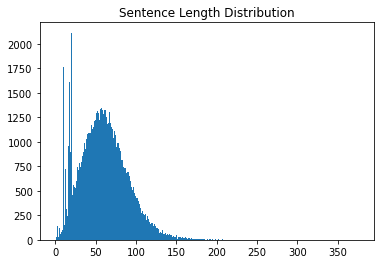

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


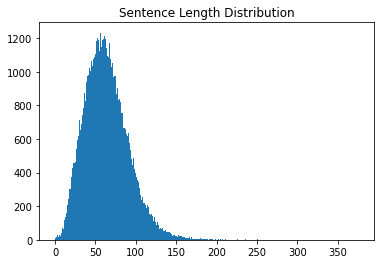

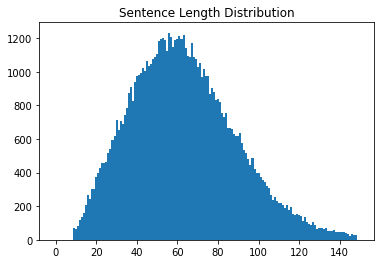

In [2]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)
    
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [3]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전에 나왔던 정제했던 corpus를 활용해서 진행해야 합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id

-rw-r--r-- 1 root root 376816 Jul  1 07:25 korean_spm.model
-rw-r--r-- 1 root root 146213 Jul  1 07:25 korean_spm.vocab


In [4]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1243, 11, 302, 7, 3608, 11, 287, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


In [5]:
def sp_tokenize(s, corpus): 

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [6]:
def get_sentence_length(data, title):
    
    min_len = 9999
    max_len = 0
    sum_len = 0
    
    for s in data:
        length = len(s)
        if min_len > length: min_len = length
        if max_len < length: max_len = length
        sum_len += length

    sentence_length = np.zeros((max_len), dtype=np.int)

    for s in data:        
        sentence_length[len(s)-1] += 1
    
    print("문장의 최단 길이:", min_len)
    print("문장의 최장 길이:", max_len)
    print("문장의 평균 길이:", sum_len // len(data))

    plt.bar(range(max_len), sentence_length, width=1.0)
    plt.title(title)
    plt.show()

# 프로젝트

## 데이터 전처리

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
data_path = '/aiffel/aiffel/sp_tokenizer/data/'

In [9]:
train_df = pd.read_csv(data_path + 'ratings_train.txt', sep='\t')
test_df = pd.read_csv(data_path + 'ratings_test.txt', sep='\t') 
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [10]:
print(train_df.shape, test_df.shape)

(150000, 3) (50000, 3)


In [11]:
print('결측치')
print(train_df['document'].isnull().sum())
print(test_df['document'].isnull().sum())

결측치
5
3


In [12]:
# 결측치 제거
train_df.dropna(how='any', inplace=True)
test_df.dropna(how='any', inplace=True)

In [13]:
print('document 중복 데이터')
print(len(train_df['document'])-len(set(train_df['document'])))
print(len(test_df['document'])-len(set(test_df['document'])))

document 중복 데이터
3813
840


In [14]:
train_df.drop_duplicates(subset='document', inplace=True)
test_df.drop_duplicates(subset='document', inplace=True)

In [15]:
print('document 중복 데이터')
print(len(train_df['document'])-len(set(train_df['document'])))
print(len(test_df['document'])-len(set(test_df['document'])))

document 중복 데이터
0
0


In [16]:
print(train_df.shape, test_df.shape)

(146182, 3) (49157, 3)


문장의 최단 길이: 1
문장의 최장 길이: 146
문장의 평균 길이: 35


/tmp/ipykernel_2860/4141193104.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


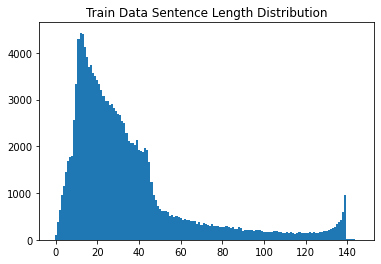

In [17]:
get_sentence_length(train_df['document'], "Train Data Sentence Length Distribution")

/tmp/ipykernel_2860/4141193104.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


문장의 최단 길이: 1
문장의 최장 길이: 144
문장의 평균 길이: 35


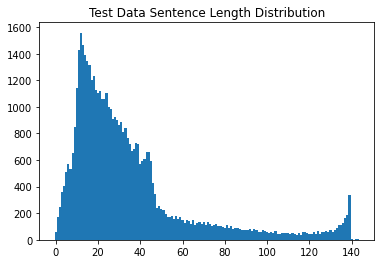

In [18]:
get_sentence_length(test_df['document'], "Test Data Sentence Length Distribution")

In [19]:
train_df[train_df['document'].apply(lambda x: len(x)) == 2]

,id,document,label
56,1651126,최고,0
72,5679106,졸작,0
113,7115568,대박,1
185,1870395,버려,0
278,7124022,망함,0
...,...,...,...
145134,5670502,우윀,0
146623,7994209,무미,0
148185,4157148,살색,0
148312,4580983,싫어,0


length 2도 충분히 의미있는 데이터라고 생각돼서 2부터 넣음.  
오히려 두글자로 이루어진 단어가 긍부정을 직접적으로 표현하는 경우가 많이보임.

In [20]:
train_df = train_df[train_df['document'].apply(lambda x: len(x)) >= 2]
train_df = train_df[train_df['document'].apply(lambda x: len(x)) <= 120]

In [21]:
test_df = test_df[test_df['document'].apply(lambda x: len(x)) >= 2]
test_df = test_df[test_df['document'].apply(lambda x: len(x)) <= 120]

/tmp/ipykernel_2860/4141193104.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


문장의 최단 길이: 2
문장의 최장 길이: 120
문장의 평균 길이: 32


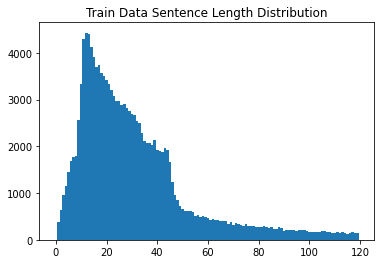

In [22]:
get_sentence_length(train_df['document'], "Train Data Sentence Length Distribution")

/tmp/ipykernel_2860/4141193104.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


문장의 최단 길이: 2
문장의 최장 길이: 120
문장의 평균 길이: 31


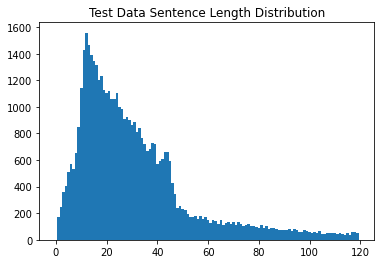

In [23]:
get_sentence_length(test_df['document'], "Test Data Sentence Length Distribution")

## 네이버 영화리뷰 감정 분석 코퍼스에 SentencePiece를 적용시킨 모델 학습하기

In [24]:
vocab_size = 8000
temp_file = data_path + "korean-english-park.train.ko.temp"

with open(temp_file, 'w') as f:
    for row in list(train_df["document"]):   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id

## 학습된 모델로 sp_tokenize() 메소드 구현하기

In [25]:
def sp_tokenize(s, corpus):
    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open(data_path+"korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post', maxlen=max_len)

    return tensor, word_index, index_word

In [26]:
s = spm.SentencePieceProcessor()
s.Load(data_path+'korean_spm.model')

X_train, X_train_word_index, X_train_index_word = sp_tokenize(s, train_df['document'])
sp_X_test, sp_X_test_word_index, sp_X_test_index_word = sp_tokenize(s, test_df['document'])

y_train = train_df['label']
y_test = test_df['label']

sp_train_input, sp_val_input, sp_train_target, sp_val_target = \
    train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [27]:
# DLTHON때 활용했던 모델을 사용하려고 하였으나, 파라미터를 아무리 줄여도 1 epoch당 소요시간이 30분 정도로 예상됨.

'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional

sp_model = Sequential()
sp_model.add(Embedding(vocab_size, 8, input_shape=(None,)))
sp_model.add(SpatialDropout1D(0.3))
sp_model.add(LSTM(8, dropout=0.5, recurrent_dropout=0.3))
sp_model.add(Dense(16, activation='relu'))
sp_model.add(Dense(1, activation='sigmoid'))

sp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(sp_model.summary())
'''

"\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional\n\nsp_model = Sequential()\nsp_model.add(Embedding(vocab_size, 8, input_shape=(None,)))\nsp_model.add(SpatialDropout1D(0.3))\nsp_model.add(LSTM(8, dropout=0.5, recurrent_dropout=0.3))\nsp_model.add(Dense(16, activation='relu'))\nsp_model.add(Dense(1, activation='sigmoid'))\n\nsp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])\nprint(sp_model.summary())\n"

In [29]:
# Conv1d 레이어로 시도

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout

sp_model = Sequential()
sp_model.add(Embedding(vocab_size, 16, input_length=sp_train_input.shape[1]))
sp_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
sp_model.add(MaxPooling1D(5))
sp_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
sp_model.add(GlobalMaxPooling1D())
sp_model.add(Dense(32, activation='relu'))
sp_model.add(Dropout(0.2))
sp_model.add(Dense(1, activation='sigmoid'))

sp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(sp_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 16)           128000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 150, 32)           1568      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 30, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 30, 32)            3104      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)               

## 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정 분석 모델을 재학습하기

In [30]:
sp_history = sp_model.fit(sp_train_input, sp_train_target, epochs=10, validation_data=(sp_val_input, sp_val_target))

Epoch 1/10
3514/3514 [==============================] - 20s 5ms/step - loss: 0.3940 - accuracy: 0.8162 - val_loss: 0.3359 - val_accuracy: 0.8525
Epoch 2/10
3514/3514 [==============================] - 16s 4ms/step - loss: 0.2943 - accuracy: 0.8775 - val_loss: 0.3262 - val_accuracy: 0.8572
Epoch 3/10
3514/3514 [==============================] - 16s 4ms/step - loss: 0.2448 - accuracy: 0.9007 - val_loss: 0.3495 - val_accuracy: 0.8479
Epoch 4/10
3514/3514 [==============================] - 16s 4ms/step - loss: 0.1944 - accuracy: 0.9251 - val_loss: 0.3647 - val_accuracy: 0.8494
Epoch 5/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.1461 - accuracy: 0.9455 - val_loss: 0.4546 - val_accuracy: 0.8442
Epoch 6/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.1084 - accuracy: 0.9610 - val_loss: 0.5258 - val_accuracy: 0.8406
Epoch 7/10
3514/3514 [==============================] - 16s 4ms/step - loss: 0.0810 - accuracy: 0.9710 - val_loss: 0.6442 - val_ac

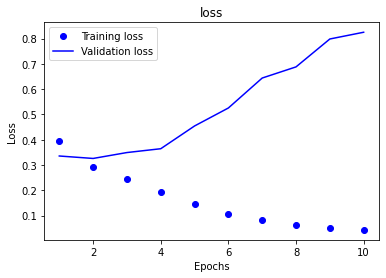

In [31]:
loss = sp_history.history['loss']
val_loss = sp_history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

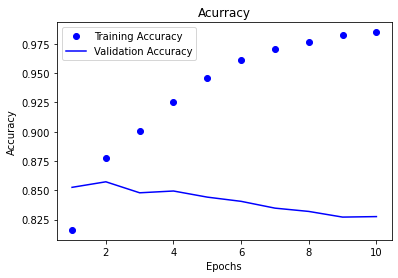

In [32]:
acc = sp_history.history['accuracy']
val_acc = sp_history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')

plt.title('Acurracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [39]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
loss, accuracy = sp_model.evaluate(sp_X_test, y_test, verbose=2)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Predict and print classification report
y_pred = sp_model.predict(sp_X_test)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)
y_true = np.array(y_test.astype(int)).reshape(-1)

print(classification_report(y_true, y_pred_classes))

1476/1476 - 2s - loss: 0.8565 - accuracy: 0.8278
Test Loss: 0.8565146327018738
Test Accuracy: 0.8278330564498901
              precision    recall  f1-score   support

           0       0.83      0.82      0.82     23348
           1       0.82      0.84      0.83     23862

    accuracy                           0.83     47210
   macro avg       0.83      0.83      0.83     47210
weighted avg       0.83      0.83      0.83     47210



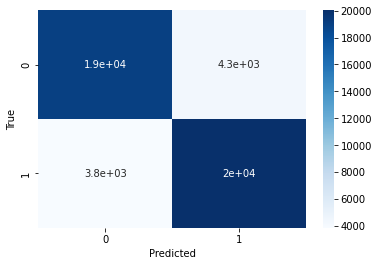

In [40]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_classes)
sn.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기(Mecab, kkma, Okt)

In [41]:
from konlpy.tag import Mecab

In [42]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
m = Mecab()

def get_mecab_tokenize(data):
    mecab_corpus = []
    
    for sentence in data:
        mecab_corpus.append(m.morphs(sentence))

    tokenizer.fit_on_texts(mecab_corpus)
    mecab_tensor = tokenizer.texts_to_sequences(mecab_corpus)
    mecab_tensor = tf.keras.preprocessing.sequence.pad_sequences(mecab_tensor, padding='post', maxlen=max_len)
    return mecab_tensor

In [43]:
mecab_X_train = get_mecab_tokenize(train_df["document"])
mecab_X_test = get_mecab_tokenize(test_df["document"])

print("vocab size: ", len(tokenizer.word_index))

vocab size:  56346


In [44]:
mecab_train_input, mecab_val_input, mecab_train_target, mecab_val_target = \
    train_test_split(X_train, y_train, test_size=0.2, random_state=2021)

In [45]:
# Conv1d 레이어로 시도

vocab_size = len(tokenizer.word_index)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

mecab_model = Sequential()
mecab_model.add(Embedding(vocab_size, 16, input_length=mecab_train_input.shape[1]))
mecab_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
mecab_model.add(MaxPooling1D(5))
mecab_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
mecab_model.add(GlobalMaxPooling1D())
mecab_model.add(Dense(32, activation='relu'))
mecab_model.add(Dropout(0.2))
mecab_model.add(Dense(1, activation='sigmoid'))

mecab_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(mecab_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 150, 16)           901536    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 150, 32)           1568      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 30, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 30, 32)            3104      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)               

In [46]:
mecab_history = mecab_model.fit(mecab_train_input, mecab_train_target, epochs=10, validation_data=(mecab_val_input, mecab_val_target))

Epoch 1/10
3514/3514 [==============================] - 17s 5ms/step - loss: 0.3907 - accuracy: 0.8188 - val_loss: 0.3384 - val_accuracy: 0.8534
Epoch 2/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.2937 - accuracy: 0.8765 - val_loss: 0.3377 - val_accuracy: 0.8556
Epoch 3/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.2460 - accuracy: 0.8991 - val_loss: 0.3417 - val_accuracy: 0.8557
Epoch 4/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.1969 - accuracy: 0.9231 - val_loss: 0.3855 - val_accuracy: 0.8524
Epoch 5/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.1483 - accuracy: 0.9444 - val_loss: 0.4258 - val_accuracy: 0.8441
Epoch 6/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.1109 - accuracy: 0.9591 - val_loss: 0.5303 - val_accuracy: 0.8434
Epoch 7/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.0844 - accuracy: 0.9694 - val_loss: 0.5979 - val_ac

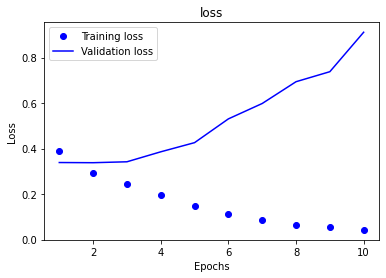

In [47]:
loss = mecab_history.history['loss']
val_loss = mecab_history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

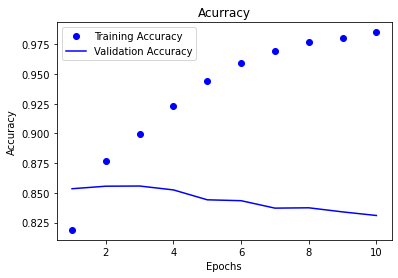

In [48]:
acc = mecab_history.history['accuracy']
val_acc = mecab_history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')

plt.title('Acurracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [49]:
# Evaluate the model on the test set
loss, accuracy = mecab_model.evaluate(mecab_X_test, y_test, verbose=2)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Predict and print classification report
y_pred = mecab_model.predict(mecab_X_test)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)
y_true = np.array(y_test.astype(int)).reshape(-1)

print(classification_report(y_true, y_pred_classes))

1476/1476 - 2s - loss: 2.7084 - accuracy: 0.5010
Test Loss: 2.7083847522735596
Test Accuracy: 0.5009743571281433
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     23348
           1       0.51      0.50      0.51     23862

    accuracy                           0.50     47210
   macro avg       0.50      0.50      0.50     47210
weighted avg       0.50      0.50      0.50     47210



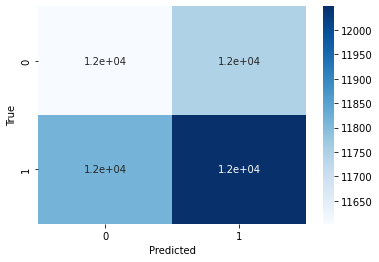

In [50]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_classes)
sn.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기

### vocab_size = 25000

In [66]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 25000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전에 나왔던 정제했던 corpus를 활용해서 진행해야 합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=25000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 25000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_

-rw-r--r-- 1 root root 717032 Jul  1 07:47 korean_spm.model
-rw-r--r-- 1 root root 501892 Jul  1 07:47 korean_spm.vocab


In [67]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

X_train, X_train_word_index, X_train_index_word = sp_tokenize(s, train_df['document'])
sp_X_test, sp_X_test_word_index, sp_X_test_index_word = sp_tokenize(s, test_df['document'])

y_train = train_df['label']
y_test = test_df['label']

sp_train_input, sp_val_input, sp_train_target, sp_val_target = \
    train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [68]:
# Conv1d 레이어로 시도

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout

vocab_size = 25000

sp_model = Sequential()
sp_model.add(Embedding(vocab_size, 16, input_length=sp_train_input.shape[1]))
sp_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
sp_model.add(MaxPooling1D(5))
sp_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
sp_model.add(GlobalMaxPooling1D())
sp_model.add(Dense(32, activation='relu'))
sp_model.add(Dropout(0.2))
sp_model.add(Dense(1, activation='sigmoid'))

sp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(sp_model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 150, 16)           400000    
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 150, 32)           1568      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 30, 32)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 30, 32)            3104      
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)               

In [69]:
sp_history = sp_model.fit(sp_train_input, sp_train_target, epochs=10, validation_data=(sp_val_input, sp_val_target))

Epoch 1/10
3514/3514 [==============================] - 17s 5ms/step - loss: 0.4048 - accuracy: 0.8142 - val_loss: 0.3535 - val_accuracy: 0.8429
Epoch 2/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.3132 - accuracy: 0.8685 - val_loss: 0.3469 - val_accuracy: 0.8486
Epoch 3/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.2603 - accuracy: 0.8958 - val_loss: 0.3529 - val_accuracy: 0.8491
Epoch 4/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.2118 - accuracy: 0.9187 - val_loss: 0.3948 - val_accuracy: 0.8443
Epoch 5/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.1731 - accuracy: 0.9349 - val_loss: 0.4211 - val_accuracy: 0.8389
Epoch 6/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.1424 - accuracy: 0.9481 - val_loss: 0.4914 - val_accuracy: 0.8367
Epoch 7/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.1197 - accuracy: 0.9557 - val_loss: 0.5674 - val_ac

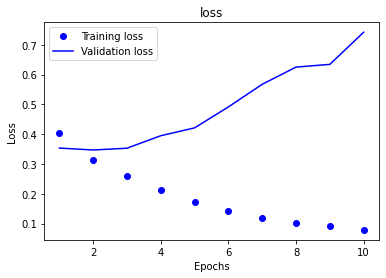

In [70]:
loss = sp_history.history['loss']
val_loss = sp_history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

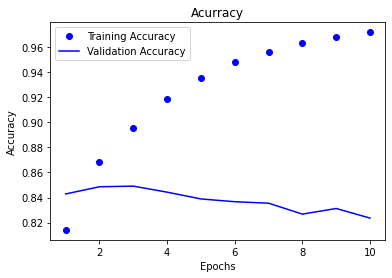

In [71]:
acc = sp_history.history['accuracy']
val_acc = sp_history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')

plt.title('Acurracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [72]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
loss, accuracy = sp_model.evaluate(sp_X_test, y_test, verbose=2)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Predict and print classification report
y_pred = sp_model.predict(sp_X_test)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)
y_true = np.array(y_test.astype(int)).reshape(-1)

print(classification_report(y_true, y_pred_classes))

1476/1476 - 2s - loss: 0.7663 - accuracy: 0.8187
Test Loss: 0.7662710547447205
Test Accuracy: 0.8186824917793274
              precision    recall  f1-score   support

           0       0.84      0.79      0.81     23348
           1       0.80      0.85      0.83     23862

    accuracy                           0.82     47210
   macro avg       0.82      0.82      0.82     47210
weighted avg       0.82      0.82      0.82     47210



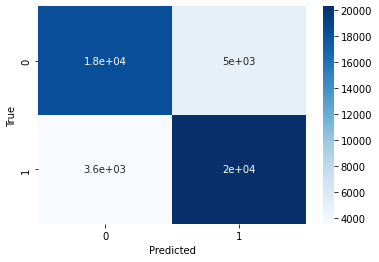

In [73]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_classes)
sn.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### vocab_size = 55000

In [74]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 55000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전에 나왔던 정제했던 corpus를 활용해서 진행해야 합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=55000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 55000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_

-rw-r--r-- 1 root root 1329760 Jul  1 07:52 korean_spm.model
-rw-r--r-- 1 root root 1139268 Jul  1 07:52 korean_spm.vocab


In [75]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

X_train, X_train_word_index, X_train_index_word = sp_tokenize(s, train_df['document'])
sp_X_test, sp_X_test_word_index, sp_X_test_index_word = sp_tokenize(s, test_df['document'])

y_train = train_df['label']
y_test = test_df['label']

sp_train_input, sp_val_input, sp_train_target, sp_val_target = \
    train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [76]:
# Conv1d 레이어로 시도

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout

vocab_size = 55000

sp_model = Sequential()
sp_model.add(Embedding(vocab_size, 16, input_length=sp_train_input.shape[1]))
sp_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
sp_model.add(MaxPooling1D(5))
sp_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
sp_model.add(GlobalMaxPooling1D())
sp_model.add(Dense(32, activation='relu'))
sp_model.add(Dropout(0.2))
sp_model.add(Dense(1, activation='sigmoid'))

sp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(sp_model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 150, 16)           880000    
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 150, 32)           1568      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 30, 32)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 30, 32)            3104      
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)               

In [77]:
sp_history = sp_model.fit(sp_train_input, sp_train_target, epochs=10, validation_data=(sp_val_input, sp_val_target))

Epoch 1/10
3514/3514 [==============================] - 17s 5ms/step - loss: 0.4021 - accuracy: 0.8132 - val_loss: 0.3456 - val_accuracy: 0.8481
Epoch 2/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.2948 - accuracy: 0.8778 - val_loss: 0.3494 - val_accuracy: 0.8466
Epoch 3/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.2286 - accuracy: 0.9113 - val_loss: 0.3719 - val_accuracy: 0.8505
Epoch 4/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.1717 - accuracy: 0.9360 - val_loss: 0.4301 - val_accuracy: 0.8435
Epoch 5/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.1296 - accuracy: 0.9530 - val_loss: 0.4834 - val_accuracy: 0.8388
Epoch 6/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.1005 - accuracy: 0.9643 - val_loss: 0.5713 - val_accuracy: 0.8298
Epoch 7/10
3514/3514 [==============================] - 16s 5ms/step - loss: 0.0805 - accuracy: 0.9713 - val_loss: 0.6010 - val_ac

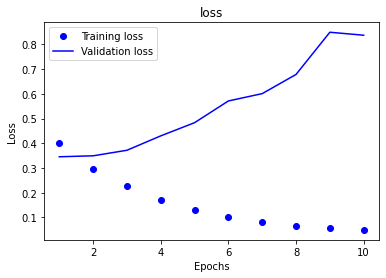

In [78]:
loss = sp_history.history['loss']
val_loss = sp_history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

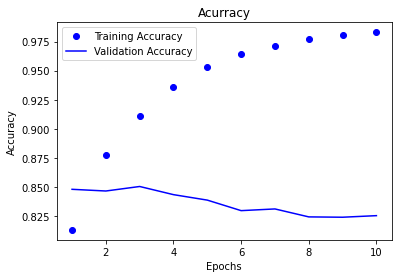

In [79]:
acc = sp_history.history['accuracy']
val_acc = sp_history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')

plt.title('Acurracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [80]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
loss, accuracy = sp_model.evaluate(sp_X_test, y_test, verbose=2)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Predict and print classification report
y_pred = sp_model.predict(sp_X_test)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)
y_true = np.array(y_test.astype(int)).reshape(-1)

print(classification_report(y_true, y_pred_classes))

1476/1476 - 2s - loss: 0.8360 - accuracy: 0.8239
Test Loss: 0.835993766784668
Test Accuracy: 0.8238932490348816
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     23348
           1       0.83      0.83      0.83     23862

    accuracy                           0.82     47210
   macro avg       0.82      0.82      0.82     47210
weighted avg       0.82      0.82      0.82     47210



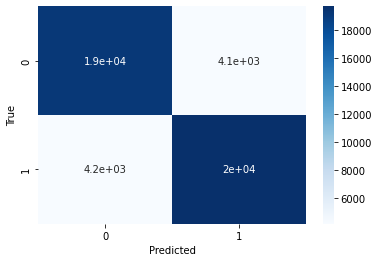

In [81]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_classes)
sn.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 모델별 결과 비교

| Model | mecab(vocab_size=56346) |  SentencePiece(vocab_size=8000) | SentencePiece(vocab_size=25000) | SentencePiece(vocab_size=55000) |
|----------|----------|----------|----------|----------|
| Test Accuracy | 0.5010 | 0.8278 | 0.8187 | 0.8239 |
| Test Loss | 2.7084 | 0.8565 | 0.7663 | 0.8360 |

## 회고

**배운점**  
 - sentencepiece와 mecab Tokenizer를 활용하여 classification을 해보았다.
   
**아쉬운점**  
 - epoch당 시간을 조절하느라 많은 실험을 못해봤다.
 - 여러가지 토크나이저를 써서 변수명 활용에 헷갈리는 경우가 많았다.   
 - 다음부터는 처음부터 함수단위로 구현하는 버릇을 들여야겠다.
  
**느낀점**  
 - 다양한 Tokenizer를 직접 써보고 장단점을 느껴보는 보고 적재적소에 활용할 필요가 있을 것 같다.
  
**어려웠던 점**
 - Tokenizing, Training 하는 시간이 계속 필요하다보니 실험을 적극적으로 하기 어려웠다.